In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouseclinicaldata_df = pd.merge(mouse_data_df, clinical_data_df, how='outer', on='Mouse ID')


# Display the data table for preview
mouseclinicaldata_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
meantumorvolume_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).mean()
                                       ['Tumor Volume (mm3)'])

# Preview DataFrame
meantumorvolume_grouped.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint and convert to dataframe
semtumorvolume_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).sem()
                                       ['Tumor Volume (mm3)'])

# Preview DataFrame
semtumorvolume_grouped.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593

In [4]:
# Minor Data Munging to Re-Format the Data Frames

#turning the drug column into separate columns
meantumorvolume_grouped_reformat = meantumorvolume_grouped.unstack('Drug')
#removing "Tumor Volume (mm3) as top level for cleaner more workable layout
meantumorvolume_grouped_reformat.columns = meantumorvolume_grouped_reformat.columns.droplevel()
#make Timepoint a column so that I can work with it in a plot
final_mean_tvolume = meantumorvolume_grouped_reformat.reset_index(level='Timepoint')

##preview to confirm data frame is reformatted
final_mean_tvolume.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818


In [5]:
#Dropping the 'Tumor Volume (mm3)' to have drugs as columns and timepoints as index
#this step will give the Standard Error df the same layout as the Mean df

semtumorvolume_grouped_reformat = semtumorvolume_grouped.unstack('Drug')
semtumorvolume_grouped_reformat.columns = semtumorvolume_grouped_reformat.columns.droplevel()
final_sem_tvolume = semtumorvolume_grouped_reformat.reset_index(level='Timepoint')

##preview to confirm data frame is reformatted
final_sem_tvolume.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.18895


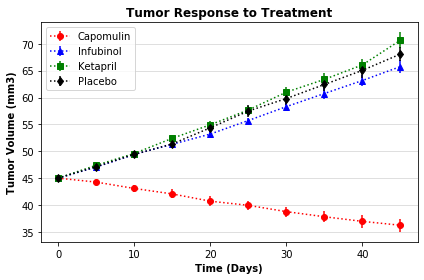

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)

x = final_mean_tvolume['Timepoint']

y1 = final_mean_tvolume ['Capomulin']
yerr1 = final_sem_tvolume['Capomulin']
plt.errorbar (x, y1, yerr1, color='red', label='Capomulin', marker='o', linestyle=":")

y2 = final_mean_tvolume ['Infubinol']
yerr2 = final_sem_tvolume['Infubinol']
plt.errorbar (x, y2, yerr2, color='blue', label='Infubinol', marker='^', linestyle=":")

y3 = final_mean_tvolume ['Ketapril']
yerr3 = final_sem_tvolume['Ketapril']
plt.errorbar (x, y3, yerr3, color='green', label='Ketapril', marker='s', linestyle=":")

y4 = final_mean_tvolume ['Placebo']
yerr4 = final_sem_tvolume['Placebo']
plt.errorbar (x, y4, yerr4, color='black', label='Placebo', marker='d', linestyle=":")

plt.legend(loc="best")

plt.title("Tumor Response to Treatment", fontweight='bold')
plt.xlabel("Time (Days)", fontweight='bold')
plt.ylabel("Tumor Volume (mm3)", fontweight='bold')

plt.grid(linestyle='-', alpha=0.5, axis="y")

plt.tight_layout()
plt.show()

# Save the Figure
plt.savefig("../Images/mean_tumor_volume.png")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint and converted to a dataframe
mean_metsite_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).mean()
                                       ['Metastatic Sites'])

# Preview DataFrame
mean_metsite_grouped.head(2)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metsite_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).sem()
                                       ['Metastatic Sites'])

# Preview DataFrame
sem_metsite_grouped.head(2)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833

In [9]:
# Minor Data Munging to Re-Format the Data Frames

#turning the drug column into separate column
mean_metsite_grouped_reformat = mean_metsite_grouped.unstack('Drug')
#removing 'Metastatic Sites' as top level for clearner more workable layout
mean_metsite_grouped_reformat.columns = mean_metsite_grouped_reformat.columns.droplevel()
#make Timepoint a column so that I can work with it in a plot
final_mean_metsite = mean_metsite_grouped_reformat.reset_index(level='Timepoint')

# Preview that Reformatting worked
final_mean_metsite.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
1,5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


In [10]:
#reformating 'standard error of metastatic sites' dataframe

#turning the drug column into separate column
sem_metsite_grouped_reformat = sem_metsite_grouped.unstack('Drug')
#removing 'Metastatic Sites' as top level for clearner more workable layout
sem_metsite_grouped_reformat.columns = sem_metsite_grouped_reformat.columns.droplevel()
#make Timepoint a column so that I can work with it in a plot
final_sem_metsite = sem_metsite_grouped_reformat.reset_index(level='Timepoint')

# Preview that Reformatting worked
final_sem_metsite.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


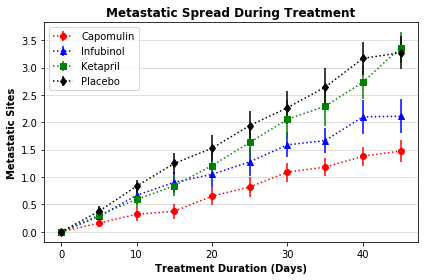

In [11]:
# Generate the Plot (with Error Bars)

x = final_mean_metsite['Timepoint']

y1 = final_mean_metsite['Capomulin']
yerr1 = final_sem_metsite['Capomulin']
plt.errorbar (x, y1, yerr1, color='red', label='Capomulin', marker='o', linestyle=":")

y2 = final_mean_metsite['Infubinol']
yerr2 = final_sem_metsite['Infubinol']
plt.errorbar (x, y2, yerr2, color='blue', label='Infubinol', marker='^', linestyle=":")

y3 = final_mean_metsite['Ketapril']
yerr3 = final_sem_metsite['Ketapril']
plt.errorbar(x, y3, yerr3, color='green', label='Ketapril', marker='s', linestyle=":")

y4 = final_mean_metsite['Placebo']
yerr4 = final_sem_metsite['Placebo']
plt.errorbar(x, y4, yerr4, color='black', label='Placebo', marker='d', linestyle=":")

plt.legend(loc="best")
                          
plt.title("Metastatic Spread During Treatment", fontweight='bold')
plt.xlabel("Treatment Duration (Days)", fontweight='bold')
plt.ylabel("Metastatic Sites", fontweight='bold')

plt.grid(linestyle='-', alpha=0.5, axis="y")

plt.tight_layout()

# Save the Figure
plt.savefig("../Images/mean_metsite.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount_grouped = pd.DataFrame(mouseclinicaldata_df.groupby(['Drug', 'Timepoint']).count()
                                       ['Mouse ID'])
# Preview DataFrame
micecount_grouped.head(5)

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
#turning the drug column into separate columns
micecount_grouped_reformat = micecount_grouped.unstack('Drug')
#removing "Mouse ID" as top level for cleaner more workable layout
micecount_grouped_reformat.columns = micecount_grouped_reformat.columns.droplevel()
#make Timepoint a column so that I can work with it in a plot
final_micecount = micecount_grouped_reformat.reset_index(level='Timepoint')

##preview to confirm data frame is reformatted
final_micecount

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [14]:
#converting mice counts to survival rates in percentages
Capomulin_percent = ((final_micecount['Capomulin'].values)/25)*100

Infubinol_percent = ((final_micecount['Infubinol'].values)/25)*100

Ketapril_percent = ((final_micecount['Ketapril'].values)/25)*100

Placebo_percent = ((final_micecount['Placebo'].values)/25)*100

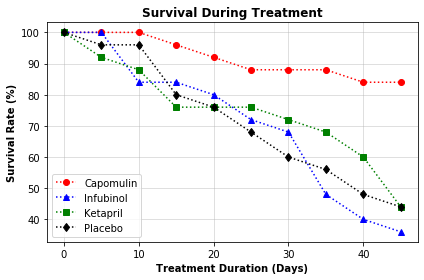

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate the Plot (Accounting for percentages)

x = final_micecount['Timepoint']

y1 = Capomulin_percent
y2 = Infubinol_percent
y3 = Ketapril_percent
y4 = Placebo_percent

plt.errorbar(x, y1, color='red', label='Capomulin', marker='o', linestyle=":")
plt.errorbar (x, y2, color='blue', label='Infubinol', marker='^', linestyle=":")
plt.errorbar(x, y3, color='green', label='Ketapril', marker='s', linestyle=":")
plt.errorbar(x, y4, color='black', label='Placebo', marker='d', linestyle=":")

plt.grid(linestyle='-', alpha=0.5)

plt.legend(loc="best")
                          
plt.title("Survival During Treatment", fontweight='bold')
plt.xlabel("Treatment Duration (Days)", fontweight='bold')
plt.ylabel("Survival Rate (%)", fontweight='bold')

# Show the Figure
plt.tight_layout()
plt.show()

# Save the Figure
plt.savefig("../Images/survivalrate.png")

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
Capomulin_tumorchange = (final_mean_tvolume.loc[9, 'Capomulin'] - final_mean_tvolume.loc[0, 'Capomulin'])/final_mean_tvolume.loc[0, 'Capomulin']*100

Infubinol_tumorchange = (final_mean_tvolume.loc[9, 'Infubinol'] - final_mean_tvolume.loc[0, 'Infubinol'])/final_mean_tvolume.loc[0, 'Infubinol']*100

Ketapril_tumorchange = (final_mean_tvolume.loc[9, 'Ketapril'] - final_mean_tvolume.loc[0, 'Ketapril'])/final_mean_tvolume.loc[0, 'Ketapril']*100

Placebo_tumorchange = (final_mean_tvolume.loc[9, 'Placebo'] - final_mean_tvolume.loc[0, 'Placebo'])/final_mean_tvolume.loc[0, 'Placebo']*100


# Store all Relevant Percent Changes into a Tuple
drug_percentchange = [
    ('Capomulin', Capomulin_tumorchange),
    ('Infubinol', Infubinol_tumorchange),
    ('Ketapril', Ketapril_tumorchange),
    ('Placebo', Placebo_tumorchange)
]

drug_percentchange_df = pd.DataFrame(drug_percentchange)

# Display the data to confirm
drug_percentchange_df

,0,1
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


![Metastatic Spread During Treatment](../Images/change.png)

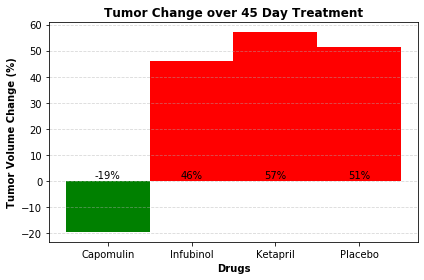

<Figure size 432x288 with 0 Axes>

In [40]:
# Plot the bar graph
x = drug_percentchange_df[0]
y = drug_percentchange_df[1]

colors = ['green' if (y < 0) else 'red' for y in y]

rects1 = plt.bar(x, y, width=1.0, color=colors, align='center')

plt.grid(linestyle='--', alpha=0.5, axis="y")
    
plt.title("Tumor Change over 45 Day Treatment", fontweight='bold')
plt.xlabel("Drugs", fontweight='bold')
plt.ylabel("Tumor Volume Change (%)", fontweight='bold')


# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #plt.annotate('{}'.format(height),
        plt.text(rect.get_x() + rect.get_width()/2, 4,
        "%d%%" % int(height),
        ha='center', va='top')
        
        
        
#def autolabelPass(rects):
#        for rect in rects:
#            height = rect.get_height()
#            ax.text(rect.get_x() + rect.get_width()/2., -8,
#			'-%d%% ' % int(height) #turn it to 0 decimals & add %sign to make it look berrer
#             ha='center', va='bottom', color=\"white\")
        
# Call functions to implement the function calls
autolabel(rects1)

# Show the Figure
plt.tight_layout()
plt.show()

# Save the Figure
plt.savefig("../Images/tumorchanges.png")